In [1]:
# Simon's 
# half of inputs are normal
# half are same outputs
# also some x1 ^ x2 = b hidden
# hmm how to solve?
# we need to find such b that for every x1, x2 we get b
# seems weirdly improbable at first or i did not understand 
# the problem
# I see, so, x1 + x2 = b just means
# we can have even to even and odd with odd
# or we can have even to odd and odd with even
# two options of how 2 : 1 could potentially work
# nvm
# example b = 11 -> (0, 3) and (1, 2) 
# pairing is the most important, 
# f(0) = f(3) somehow but that doesn't matter
# similarly to even odd idea, but 
# if b == 00..000 then it is 1 : 1 map
# otherwise 2 : 1 map

# ok classically we just randomly choose x and check if it
# is mapped 1 : 1 if not then we found out

# quantum
# some Q => xa -> x(a+f(x))
# ok if a == 0, Q => x0 -> xf(x)

# measure 
# x 
# y = x + b  (x + y = b) where + is xor
# ... ok lul
# we get ret = b * z and we need n of those linearly indep

In [30]:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

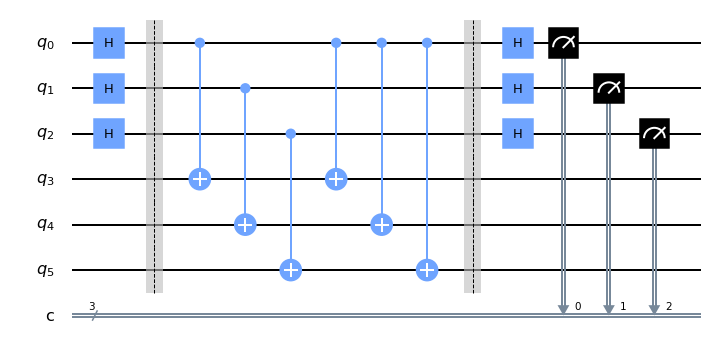

In [36]:
b = '111'
n = len(b)
simon_circuit = QuantumCircuit(n * 2, n)

simon_circuit.h(range(n))
simon_circuit.barrier()
simon_circuit += simon_oracle(b)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

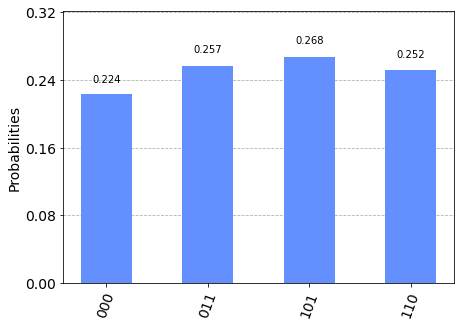

In [37]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simon_circuit, backend = backend, shots = shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [38]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)
for z in counts: 
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b, z)))

111.011 = 0 (mod 2)
111.110 = 0 (mod 2)
111.000 = 0 (mod 2)
111.101 = 0 (mod 2)


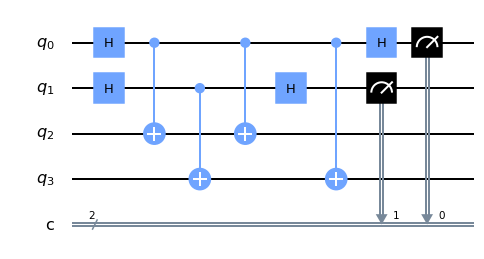

In [16]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n * 2, n)
simon_circuit_2.h(range(n))
simon_circuit_2 += simon_oracle(b)
simon_circuit_2.h(range(n))

simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw('mpl')

In [10]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                      not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


ibmqfactory.load_account:WARNING:2020-10-03 14:41:42,831: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_16_melbourne


Job Status: job has successfully run


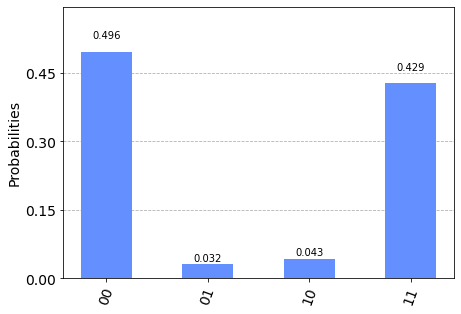

In [11]:
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(simon_circuit_2, backend = backend, shots = shots, optimization_level = 3)
job_monitor(job, interval = 2)
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [13]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts: 
    print('{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))
    

b = 11
11.00 = 0 (mod 2) (49.6%)
11.01 = 1 (mod 2) (3.2%)
11.10 = 1 (mod 2) (4.3%)
11.11 = 0 (mod 2) (42.9%)


In [39]:
# oof problems 
# implement Simon oracle :(
def so(b):
    n = len(b)
    ret = QuantumCircuit(n * 2, n)
    # just quessing
    for i in range(len(b)):
        ret.cx(i, i + n)
    b = b[::-1]
    for i in range(len(b)):
        if b[i] == '1':
            ret.cx(0, i + n)
    return ret



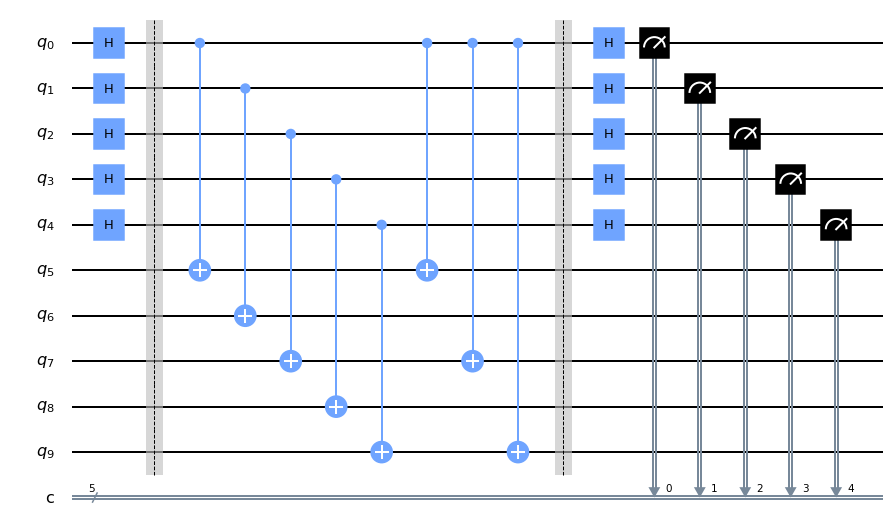

In [44]:
b = '10101'
n = len(b)
simon_circuit = QuantumCircuit(n * 2, n)

simon_circuit.h(range(n))
simon_circuit.barrier()
simon_circuit += so(b)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

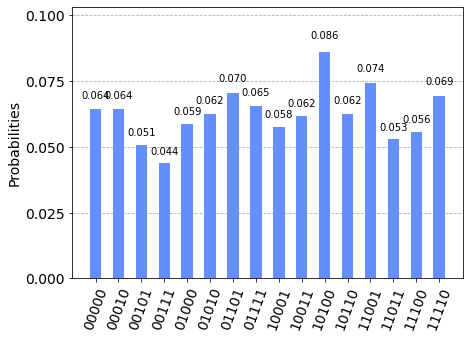

In [45]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simon_circuit, backend = backend, shots = shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [46]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)
for z in counts: 
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b, z)))

10101.01111 = 0 (mod 2)
10101.01000 = 0 (mod 2)
10101.01101 = 0 (mod 2)
10101.11001 = 0 (mod 2)
10101.00111 = 0 (mod 2)
10101.00000 = 0 (mod 2)
10101.11110 = 0 (mod 2)
10101.10100 = 0 (mod 2)
10101.00101 = 0 (mod 2)
10101.01010 = 0 (mod 2)
10101.00010 = 0 (mod 2)
10101.10001 = 0 (mod 2)
10101.11011 = 0 (mod 2)
10101.10011 = 0 (mod 2)
10101.10110 = 0 (mod 2)
10101.11100 = 0 (mod 2)


In [48]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}